In [8]:
import warnings
warnings.filterwarnings('ignore')

# Name- Zoya Nizam Mansoori

### Task 2: Prediction Using Unsupervised Machine Learning

(From the given 'iris' dataset, predict the optimum number of clussters and represent it visually.)

### K-Means Clustering Algorithm

#### 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets

#### 2. Loading the iris dataset as np

scikit_learn comes with a few small dataset. This iris dataset can be loaded with load-iris function of sklearn dataset.

In [2]:
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_x_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
iris_x_df.shape

(150, 4)

In [4]:
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### 3. Using 'Elbow Method' to find optimum number of clusters for K-Means Classification

In [9]:
from sklearn.cluster import KMeans
x = iris_x_df.iloc[:,:].values
wcs = []    #wcss stands for 'Within Cluster Sum of Squares'


for i in range (1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 250,
                  n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)
    
    
print(wcs)

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.03998724608725, 34.420191786283894, 30.014398496240606, 28.052316017316016, 25.972596377306907, 24.518890070541776, 22.739761572370437, 21.25704709875608, 20.400203661327232, 18.880291848502377, 18.057419913419913, 17.30083008658009, 16.38452867965368, 16.01317495657937, 14.829987734487739]


#### 4. Plotting the Result(line Graph)

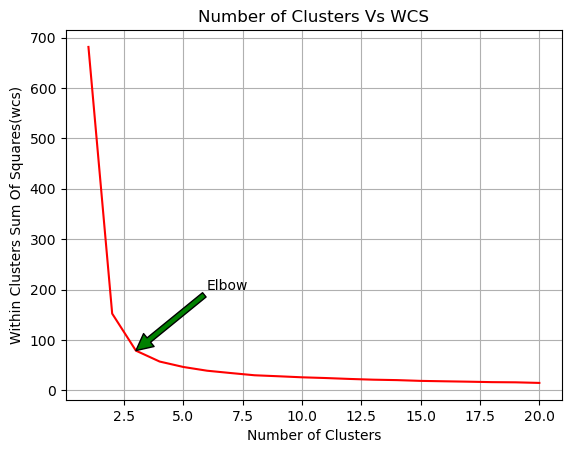

In [10]:
plt.plot(range(1,21),wcs, color= 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum Of Squares(wcs)')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.grid()
plt.show()

##### So optimum number of clusters for this Iris dataset = 3

#### 5. Create and Train the Model (KMeans)

In [11]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 250,
                  n_init = 15, random_state = 0)
y = model.fit_predict(x)

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### 6. Visualizing the Clusters by plotting scatter Graph

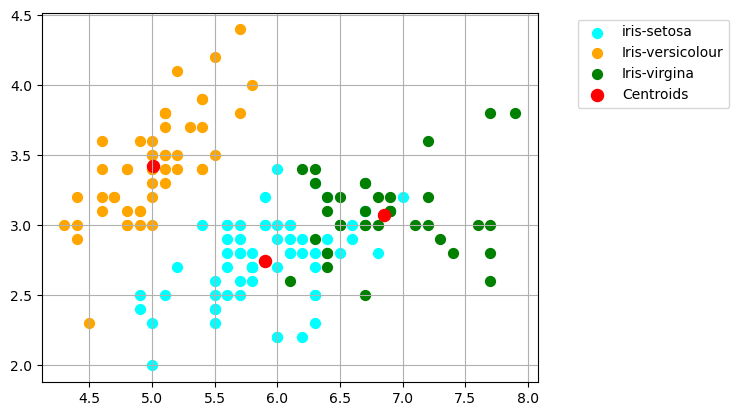

In [13]:
# Plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 50,
           c = 'cyan', label = 'iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 50,
           c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 50,
           c = 'green', label = 'Iris-virgina')

# Plotting the centroida of each clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],
           s = 75, c = 'red', label = 'Centroids')

plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.grid()

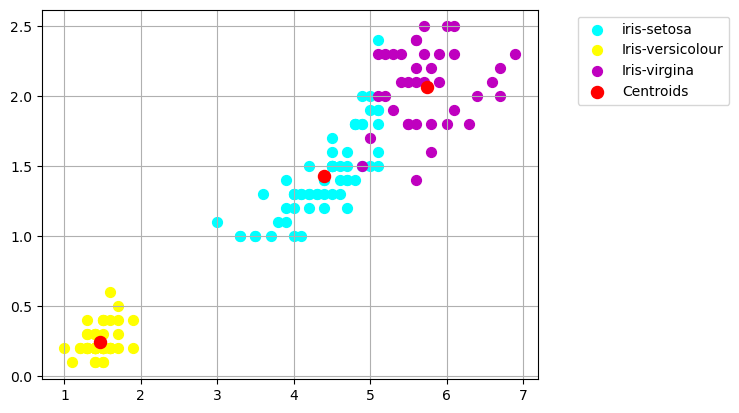

In [14]:
# Plotting the three clusters of third and fourth columns (petal length, petal width) of Iris data
plt.scatter(x[y == 0, 2], x[y == 0, 3], s = 50,
           c = 'cyan', label = 'iris-setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], s = 50,
           c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 2], x[y == 2, 3], s = 50,
           c = 'm', label = 'Iris-virgina')

# Plotting the centroida of each clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3],
           s = 75, c = 'red', label = 'Centroids')

plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.grid()

## Thank You! 😇